In [ ]:
!pip install scikit-plot
!pip install imbalanced-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import f1_score,plot_precision_recall_curve,roc_curve,confusion_matrix,balanced_accuracy_score, plot_confusion_matrix, average_precision_score,precision_score,recall_score,classification_report
import scikitplot as skplt
from sklearn.metrics import f1_score,precision_recall_curve, accuracy_score, matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV, learning_curve


In [ ]:
from google.colab import drive
drive.mount('/content/data', force_remount=True)

Mounted at /content/data


# New Section

In [ ]:
data1 = pd.read_csv("/content/data/My Drive/pe_section_headers.csv")

In [ ]:
data2 = pd.read_csv("/content/data/My Drive/top_1000_pe_imports.csv")

In [ ]:
data1.drop_duplicates(['hash'], inplace = True)

In [ ]:
df = pd.merge(data1, data2, on = 'hash')
df.head()

,hash,size_of_data,virtual_address,entropy,virtual_size,malware_x,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,FindClose,LeaveCriticalSection,EnterCriticalSection,VirtualAlloc,DeleteCriticalSection,WideCharToMultiByte,RegCloseKey,ReadFile,SetFilePointer,GetCurrentProcess,GetACP,UnhandledExceptionFilter,RaiseException,RtlUnwind,TlsGetValue,TlsSetValue,GetModuleHandleW,GetCPInfo,GetCurrentProcessId,VirtualFree,GetDC,GetModuleFileNameW,CreateFileW,SetEndOfFile,...,malloc,_XcptFilter,__vbaFreeVarList,CoInitializeEx,GetTextColor,GetUserNameA,listen,inet_addr,TextOutW,__p__commode,IsValidAcl,gethostname,PostThreadMessageW,ReportEventW,__vbaFreeObj,CreateFileMappingA,DragQueryFileW,_onexit,ImpersonateLoggedOnUser,InitializeAcl,MessageBoxIndirectW,SendDlgItemMessageW,__vbaVarMove,GetDriveTypeA,GetCurrentObject,GetNearestPaletteIndex,DosDateTimeToFileTime,FreeConsole,SetFileSecurityA,DuplicateToken,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware_y
0,071e8c3f8922e186e57548cd4c703a5d,443392,4096,6.529624,442984,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,33f8e6d08a6aae939f25a8e0d63dd523,331264,4096,6.604314,330784,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,b68abd064e975e1c6d5f25e748663076,74240,4096,6.046789,73819,1,1,1,1,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,72049be7bd30ea61297ea624ae198067,219648,4096,6.497018,219524,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,c9b3700a77facf29172f32df6bc77f48,262144,4096,6.638142,261943,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
howmanyna=df.isna().sum().sum()
print(howmanyna)

0


In [ ]:
df['malware_x'].value_counts()

1    41450
0     1723
Name: malware_x, dtype: int64

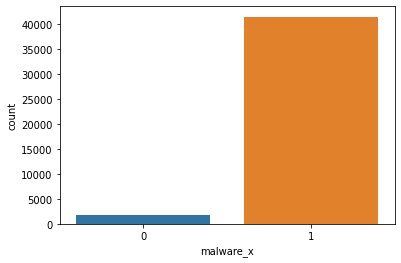

In [ ]:
%matplotlib inline
import seaborn as sns
sns.countplot(data=df,x="malware_x")

In [ ]:
df['malware_y'].value_counts()

1    41449
0     1724
Name: malware_y, dtype: int64

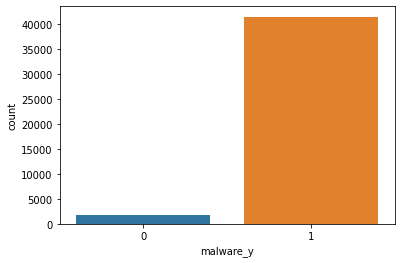

In [ ]:
%matplotlib inline
import seaborn as sns
sns.countplot(data=df,x="malware_y")

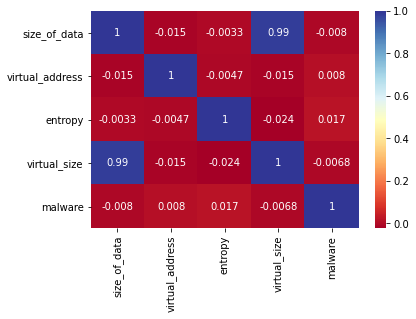

In [ ]:
sns.heatmap(data1.corr(),annot = True, cmap = "RdYlBu")
plt.draw()

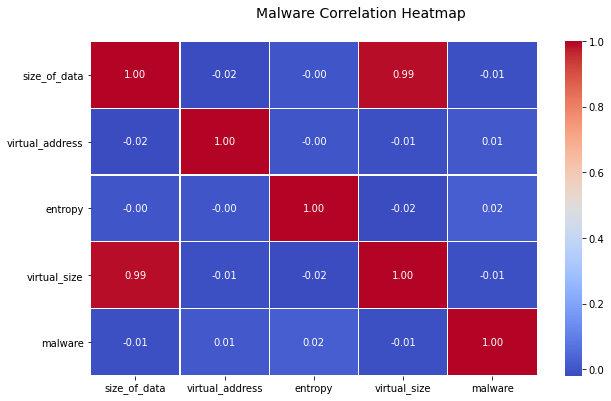

In [ ]:
# create correlation matrix heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = data1.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.9)
t= f.suptitle('Malware Correlation Heatmap', fontsize=14)

In [ ]:
howmanyna=df.isna().sum().sum()
print(howmanyna)

0


In [ ]:
df.drop(['hash', 'malware_x'], axis = 1, inplace = True)
df.rename(columns = { "malware_y" : "malware" }, inplace = True)

In [ ]:
df['malware'].value_counts()

1    41449
0     1724
Name: malware, dtype: int64

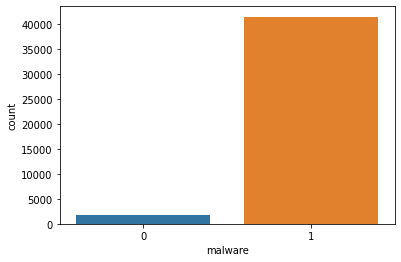

In [ ]:
%matplotlib inline
import seaborn as sns
sns.countplot(data=df,x="malware")

In [ ]:
X = df.values[:, 0:3].astype("float")
X = np.concatenate((X, df.values[:,3:1003].astype("uint8")), axis = 1)
y = df.values[:, 1003].astype("uint8")
print(X.shape)
print(y.shape)

(43173, 1003)
(43173,)


the stratify parameter within train_test split is ensuring a stratified split of classes for cinary classess within a dataset, however for multi-class distributed stratification stratify need to be defined therefore it is recommended to define the stratify parameter for any classification task


In [ ]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=None)
for train_index,test_index in skf.split(X,y):
    x1_train,x1_test=X[train_index],X[test_index]
    y1_train,y1_test=y[train_index],y[test_index]
    train_0, train_1 = len(y1_train[y1_train==0]), len(y1_train[y1_train==1])
    test_0, test_1 = len(y1_test[y1_test==0]), len(y1_test[y1_test==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=33636, 1=902, Test: 0=8410, 1=225
>Train: 0=33637, 1=901, Test: 0=8409, 1=226
>Train: 0=33637, 1=901, Test: 0=8409, 1=226
>Train: 0=33637, 1=902, Test: 0=8409, 1=225
>Train: 0=33637, 1=902, Test: 0=8409, 1=225


In [ ]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((34539, 1003), (8634, 1003), (34539,), (8634,))

In [ ]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1], random_state=0)
X1_res, y1_res = smote_nc.fit_resample(x1_train, y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
len(X1_res)

67274

In [ ]:
len(y1_res)

67274

In [ ]:
from collections import Counter
print(sorted(Counter(y1_res).items()))

[(0, 33637), (1, 33637)]


In [ ]:
dclf = DecisionTreeClassifier()

In [ ]:
dclf_f= dclf.fit(X1_res, y1_res)
y_pred_dclf_f = dclf_f.predict(x1_test)

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 


features = list(df.columns[:-2])
features

['size_of_data',
 'virtual_address',
 'entropy',
 'virtual_size',
 'GetProcAddress',
 'ExitProcess',
 'WriteFile',
 'GetLastError',
 'CloseHandle',
 'FreeLibrary',
 'Sleep',
 'GetStdHandle',
 'MultiByteToWideChar',
 'GetCurrentThreadId',
 'FindClose',
 'LeaveCriticalSection',
 'EnterCriticalSection',
 'VirtualAlloc',
 'DeleteCriticalSection',
 'WideCharToMultiByte',
 'RegCloseKey',
 'ReadFile',
 'SetFilePointer',
 'GetCurrentProcess',
 'GetACP',
 'UnhandledExceptionFilter',
 'RaiseException',
 'RtlUnwind',
 'TlsGetValue',
 'TlsSetValue',
 'GetModuleHandleW',
 'GetCPInfo',
 'GetCurrentProcessId',
 'VirtualFree',
 'GetDC',
 'GetModuleFileNameW',
 'CreateFileW',
 'SetEndOfFile',
 'SetLastError',
 'GetCommandLineW',
 'DestroyWindow',
 'QueryPerformanceCounter',
 'VirtualQuery',
 'ShowWindow',
 'GetFileType',
 'TerminateProcess',
 'HeapFree',
 'HeapAlloc',
 'CreateThread',
 'BeginPaint',
 'EndPaint',
 'GlobalAlloc',
 'GetModuleHandleA',
 'GetCommandLineA',
 'GetWindowRect',
 'DeleteObject',

In [ ]:
dot_data = StringIO()  
export_graphviz(dclf_f, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [ ]:
print("F1-Score: %.4f" % (f1_score(y1_test,y_pred_dclf_f))) 
print("Precision Score: %.4f" %(precision_score(y1_test, y_pred_dclf_f)))
print("Recall core: %.4f" %(recall_score(y1_test, y_pred_dclf_f)))
print("Accuracy Score: %.4f" %(accuracy_score(y1_test, y_pred_dclf_f)))
print("Balanced Accurarcy Score: %.4f" %(balanced_accuracy_score(y1_test, y_pred_dclf_f)))
print("Matthews Corrcoef: %.4f" %(matthews_corrcoef(y1_test, y_pred_dclf_f)))
print("Average Precision Score: %.4f" %(average_precision_score(y1_test, y_pred_dclf_f)))

F1-Score: 0.9224
Precision Score: 0.8954
Recall core: 0.9511
Accuracy Score: 0.9958
Balanced Accurarcy Score: 0.9741
Matthews Corrcoef: 0.9207
Average Precision Score: 0.8529


In [ ]:
average_precision = average_precision_score(y1_test, y_pred_dclf_f) 

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision=0.85')

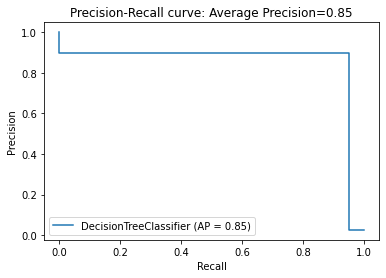

In [ ]:
disp = plot_precision_recall_curve(dclf_f, x1_test, y1_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'Average Precision={0:0.2f}'.format(average_precision)) 

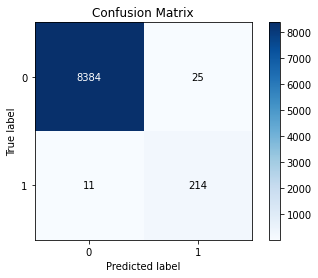

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8409
           1       0.90      0.95      0.92       225

    accuracy                           1.00      8634
   macro avg       0.95      0.97      0.96      8634
weighted avg       1.00      1.00      1.00      8634



In [ ]:
tn, fp, fn, tp = confusion_matrix(y1_test, y_pred_dclf_f ).ravel()
skplt.metrics.plot_confusion_matrix(y1_test, y_pred_dclf_f)
plt.show()
print(classification_report(y1_test,y_pred_dclf_f))


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y1_test, y_pred_dclf_f)

0.9740690529987711

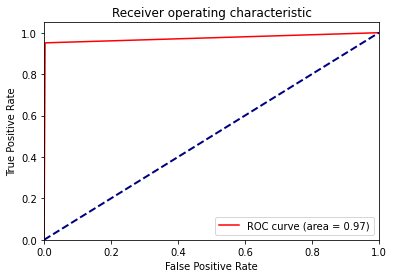

In [ ]:
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_dclf_f)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(dclf_f, X, y)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

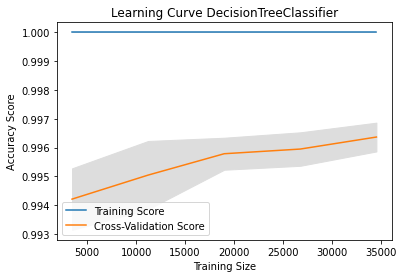

In [ ]:
plt.plot(train_sizes, train_mean, label = "Training Score")
plt.plot(train_sizes, test_mean, label = "Cross-Validation Score")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color="#DDDDDD")

plt.title("Learning Curve DecisionTreeClassifier")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend(loc = "best")
plt.show()

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
rfc_f= rfc.fit(X1_res, y1_res)

In [ ]:
y_pred_rfc = rfc_f.predict(x1_test)
rfc_predict_proba = rfc_f.predict_proba(x1_test)

In [ ]:
f1_score(y1_test,y_pred_rfc)

0.9589041095890412

In [ ]:
accuracy_score(y1_test, y_pred_rfc)

0.9979152189020153

In [ ]:
balanced_accuracy_score(y1_test, y_pred_rfc)

0.9664882863598525

In [ ]:
precision_score(y1_test, y_pred_rfc ) 

0.9859154929577465

In [ ]:
recall_score(y1_test, y_pred_rfc) 

0.9333333333333333

In [ ]:
matthews_corrcoef(y1_test, y_pred_rfc)

0.9582140589159093

In [ ]:
average_precision_score(y1_test, y_pred_rfc) 

0.9219251110088841

In [ ]:
average_precision = average_precision_score(y1_test, y_pred_rfc) 

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision=0.92')

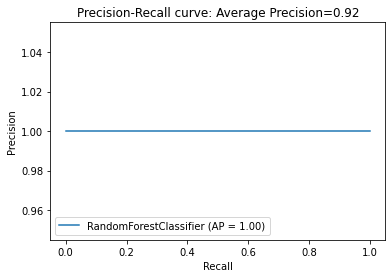

In [ ]:
disp = plot_precision_recall_curve(rfc_f, x1_test, y_pred_rfc)
disp.ax_.set_title('Precision-Recall curve: '
                   'Average Precision={0:0.2f}'.format(average_precision))  

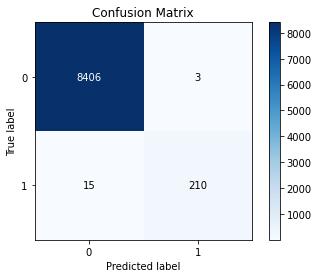

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8409
           1       0.99      0.93      0.96       225

    accuracy                           1.00      8634
   macro avg       0.99      0.97      0.98      8634
weighted avg       1.00      1.00      1.00      8634



In [ ]:
tn, fp, fn, tp = confusion_matrix(y1_test, y_pred_rfc ).ravel()
skplt.metrics.plot_confusion_matrix(y1_test, y_pred_rfc, normalize=False)
plt.show()
print(classification_report(y1_test,y_pred_rfc))

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y1_test, y_pred_rfc)

0.9664882863598526

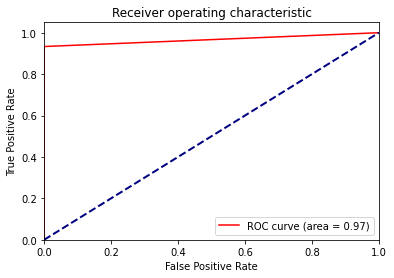

In [ ]:
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_rfc)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(rfc, X, y, cv=10)
train_mean = np.mean(train_scores, axis = 1)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

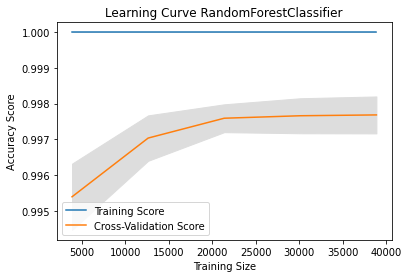

In [ ]:
plt.plot(train_sizes, train_mean, label = "Training Score")
plt.plot(train_sizes, test_mean, label = "Cross-Validation Score")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color="#DDDDDD")

plt.title("Learning Curve RandomForestClassifier")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend(loc = "best")
plt.show()

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb_f = xgb.fit(X1_res, y1_res)
y_pred_xgb = xgb_f.predict(x1_test)

In [ ]:
print("F1-Score: %.4f" % (f1_score(y1_test,y_pred_xgb))) 
print("Precision Score: %.4f" %(precision_score(y1_test, y_pred_xgb)))
print("Recall core: %.4f" %(recall_score(y1_test, y_pred_xgb)))
print("Accuracy Score: %.4f" %(accuracy_score(y1_test, y_pred_xgb)))
print("Balanced Accurarcy Score: %.4f" %(balanced_accuracy_score(y1_test, y_pred_xgb)))
print("Matthews Corrcoef: %.4f" %(matthews_corrcoef(y1_test, y_pred_xgb)))
print("Average Precision Score: %.4f" %(average_precision_score(y1_test, y_pred_xgb)))

F1-Score: 0.9254
Precision Score: 0.9134
Recall core: 0.9378
Accuracy Score: 0.9961
Balanced Accurarcy Score: 0.9677
Matthews Corrcoef: 0.9235
Average Precision Score: 0.8582


In [ ]:
average_precision = average_precision_score(y1_test, y_pred_xgb) 

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision=0.86')

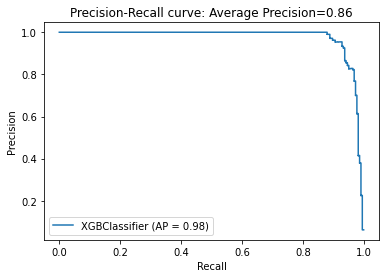

In [ ]:
disp = plot_precision_recall_curve(xgb_f, x1_test, y1_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'Average Precision={0:0.2f}'.format(average_precision)) 

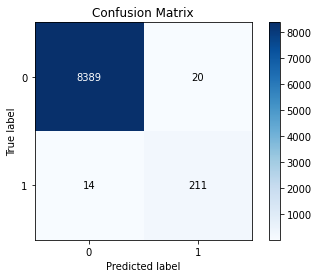

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8409
           1       0.91      0.94      0.93       225

    accuracy                           1.00      8634
   macro avg       0.96      0.97      0.96      8634
weighted avg       1.00      1.00      1.00      8634



In [ ]:
tn, fp, fn, tp = confusion_matrix(y1_test,y_pred_xgb).ravel()
skplt.metrics.plot_confusion_matrix(y1_test,y_pred_xgb, normalize=False)
plt.show()
print(classification_report(y1_test,y_pred_xgb))

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(xgb, X, y)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

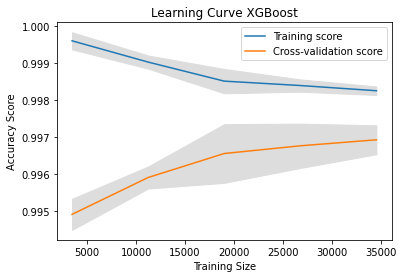

In [ ]:
plt.plot(train_sizes, train_mean, label = "Training score")
plt.plot(train_sizes, test_mean, label = "Cross-validation score")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color="#DDDDDD")

plt.title("Learning Curve XGBoost")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend(loc = "best")
plt.show()

In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 95kB/s 


In [ ]:
from catboost import CatBoostClassifier, Pool, cv

In [ ]:
model = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42,
    logging_level='Silent'
)
model.fit(
    X1_res, y1_res,
    eval_set=(X1_res, y1_res),
    logging_level='Verbose',  
    plot=False
);


Learning rate set to 0.089616
0:	learn: 0.4746671	test: 0.4746671	best: 0.4746671 (0)	total: 532ms	remaining: 8m 51s
1:	learn: 0.3327925	test: 0.3327925	best: 0.3327925 (1)	total: 954ms	remaining: 7m 56s
2:	learn: 0.2411060	test: 0.2411060	best: 0.2411060 (2)	total: 1.4s	remaining: 7m 43s
3:	learn: 0.1827720	test: 0.1827720	best: 0.1827720 (3)	total: 1.83s	remaining: 7m 35s
4:	learn: 0.1385407	test: 0.1385407	best: 0.1385407 (4)	total: 2.28s	remaining: 7m 34s
5:	learn: 0.1040606	test: 0.1040606	best: 0.1040606 (5)	total: 2.72s	remaining: 7m 31s
6:	learn: 0.0899940	test: 0.0899940	best: 0.0899940 (6)	total: 3.17s	remaining: 7m 29s
7:	learn: 0.0763950	test: 0.0763950	best: 0.0763950 (7)	total: 3.59s	remaining: 7m 24s
8:	learn: 0.0666980	test: 0.0666980	best: 0.0666980 (8)	total: 4.01s	remaining: 7m 21s
9:	learn: 0.0595647	test: 0.0595647	best: 0.0595647 (9)	total: 4.42s	remaining: 7m 18s
10:	learn: 0.0518899	test: 0.0518899	best: 0.0518899 (10)	total: 4.88s	remaining: 7m 18s
11:	learn: 0

In [ ]:
y_pred_cat = model.predict(x1_test)
f1_score(y1_test,y_pred_cat)

0.9457013574660633

In [ ]:
balanced_accuracy_score(y1_test, y_pred_cat)

0.9639687636262735

In [ ]:
print("F1-Score: %.4f" % (f1_score(y1_test,y_pred_cat))) 
print("Precision Score: %.4f" %(precision_score(y1_test, y_pred_cat)))
print("Recall core: %.4f" %(recall_score(y1_test, y_pred_cat)))
print("Accuracy Score: %.4f" %(accuracy_score(y1_test, y_pred_cat)))
print("Balanced Accurarcy Score: %.4f" %(balanced_accuracy_score(y1_test, y_pred_cat)))
print("Matthews Corrcoef: %.4f" %(matthews_corrcoef(y1_test, y_pred_cat)))
print("Average Precision Score: %.4f" %(average_precision_score(y1_test, y_pred_cat)))

F1-Score: 0.9457
Precision Score: 0.9631
Recall core: 0.9289
Accuracy Score: 0.9972
Balanced Accurarcy Score: 0.9640
Matthews Corrcoef: 0.9444
Average Precision Score: 0.8965


In [ ]:
average_precision = average_precision_score(y1_test, y_pred_cat) 

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision=0.90')

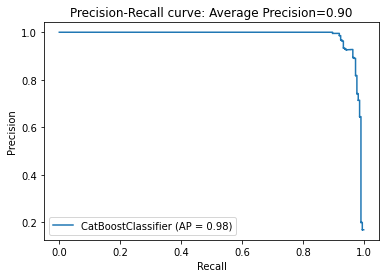

In [ ]:
disp = plot_precision_recall_curve(model, x1_test, y1_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'Average Precision={0:0.2f}'.format(average_precision)) 

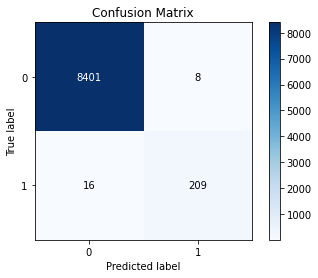

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8409
           1       0.96      0.93      0.95       225

    accuracy                           1.00      8634
   macro avg       0.98      0.96      0.97      8634
weighted avg       1.00      1.00      1.00      8634



In [ ]:
tn, fp, fn, tp = confusion_matrix(y1_test, y_pred_cat ).ravel()
skplt.metrics.plot_confusion_matrix(y1_test, y_pred_cat, normalize=False)
plt.show()
print(classification_report(y1_test,y_pred_cat))

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_f = knn.fit(X1_res, y1_res)

In [ ]:
y_pred_knn = knn_f.predict(x1_test)

In [ ]:
print("F1-Score: %.4f" % (f1_score(y1_test,y_pred_knn))) 
print("Precision Score: %.4f" %(precision_score(y1_test, y_pred_knn)))
print("Recall core: %.4f" %(recall_score(y1_test, y_pred_knn)))
print("Accuracy Score: %.4f" %(accuracy_score(y1_test, y_pred_knn)))
print("Balanced Accurarcy Score: %.4f" %(balanced_accuracy_score(y1_test, y_pred_knn)))
print("Matthews Corrcoef: %.4f" %(matthews_corrcoef(y1_test, y_pred_knn)))
print("Average Precision Score: %.4f" %(average_precision_score(y1_test, y_pred_knn)))

F1-Score: 0.8136
Precision Score: 0.7773
Recall core: 0.8533
Accuracy Score: 0.9898
Balanced Accurarcy Score: 0.9234
Matthews Corrcoef: 0.8093
Average Precision Score: 0.6671


In [ ]:
average_precision = average_precision_score(y1_test, y_pred_knn) 

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision=0.67')

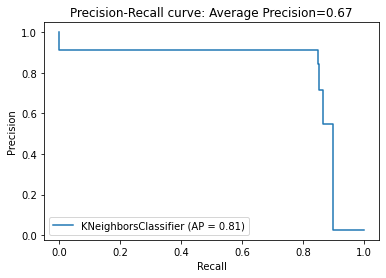

In [ ]:
disp = plot_precision_recall_curve(knn_f, x1_test, y1_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'Average Precision={0:0.2f}'.format(average_precision)) 

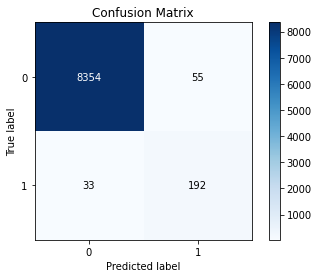

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8409
           1       0.78      0.85      0.81       225

    accuracy                           0.99      8634
   macro avg       0.89      0.92      0.90      8634
weighted avg       0.99      0.99      0.99      8634



In [ ]:
tn, fp, fn, tp = confusion_matrix(y1_test,y_pred_knn).ravel()
skplt.metrics.plot_confusion_matrix(y1_test,y_pred_knn, normalize=False)
plt.show()
print(classification_report(y1_test,y_pred_knn))

In [ ]:
lg = LogisticRegression()

In [ ]:
lg_f = lg.fit(X1_res, y1_res)

In [ ]:
y_pred_lg = lg_f.predict(x1_test)

In [ ]:
print("F1-Score: %.4f" % (f1_score(y1_test,y_pred_lg))) 
print("Precision Score: %.4f" %(precision_score(y1_test, y_pred_lg)))
print("Recall core: %.4f" %(recall_score(y1_test, y_pred_lg)))
print("Accuracy Score: %.4f" %(accuracy_score(y1_test, y_pred_lg)))
print("Balanced Accurarcy Score: %.4f" %(balanced_accuracy_score(y1_test, y_pred_lg)))
print("Matthews Corrcoef: %.4f" %(matthews_corrcoef(y1_test, y_pred_lg)))
print("Average Precision Score: %.4f" %(average_precision_score(y1_test, y_pred_lg)))

F1-Score: 0.2684
Precision Score: 0.1599
Recall core: 0.8356
Accuracy Score: 0.8813
Balanced Accurarcy Score: 0.8590
Matthews Corrcoef: 0.3335
Average Precision Score: 0.1379


In [ ]:
average_precision = average_precision_score(y1_test, y_pred_lg) 

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision=0.14')

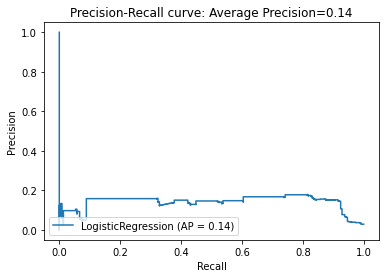

In [ ]:
disp = plot_precision_recall_curve(lg_f, x1_test, y1_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'Average Precision={0:0.2f}'.format(average_precision)) 

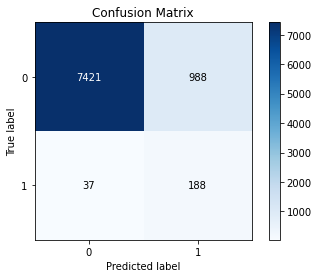

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      8409
           1       0.16      0.84      0.27       225

    accuracy                           0.88      8634
   macro avg       0.58      0.86      0.60      8634
weighted avg       0.97      0.88      0.92      8634



In [ ]:
tn, fp, fn, tp = confusion_matrix(y1_test,y_pred_lg).ravel()
skplt.metrics.plot_confusion_matrix(y1_test,y_pred_lg, normalize=False)
plt.show()
print(classification_report(y1_test,y_pred_lg))

In [ ]:
NB = GaussianNB()

In [ ]:
NB_f = NB.fit(X1_res, y1_res)

In [ ]:
y_pred_NB = NB_f.predict(x1_test)

In [ ]:
print("F1-Score: %.4f" % (f1_score(y1_test,y_pred_NB))) 
print("Precision Score: %.4f" %(precision_score(y1_test, y_pred_NB)))
print("Recall core: %.4f" %(recall_score(y1_test, y_pred_NB)))
print("Accuracy Score: %.4f" %(accuracy_score(y1_test, y_pred_NB)))
print("Balanced Accurarcy Score: %.4f" %(balanced_accuracy_score(y1_test, y_pred_NB)))
print("Matthews Corrcoef: %.4f" %(matthews_corrcoef(y1_test, y_pred_NB)))
print("Average Precision Score: %.4f" %(average_precision_score(y1_test, y_pred_NB)))

F1-Score: 0.0541
Precision Score: 0.0278
Recall core: 0.9956
Accuracy Score: 0.0927
Balanced Accurarcy Score: 0.5320
Matthews Corrcoef: 0.0409
Average Precision Score: 0.0278


In [ ]:
average_precision = average_precision_score(y1_test, y_pred_NB) 

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision=0.03')

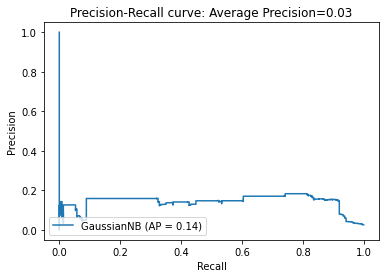

In [ ]:
disp = plot_precision_recall_curve(NB_f, x1_test, y1_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'Average Precision={0:0.2f}'.format(average_precision)) 

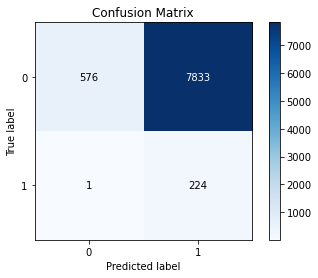

              precision    recall  f1-score   support

           0       1.00      0.07      0.13      8409
           1       0.03      1.00      0.05       225

    accuracy                           0.09      8634
   macro avg       0.51      0.53      0.09      8634
weighted avg       0.97      0.09      0.13      8634



In [ ]:
tn, fp, fn, tp = confusion_matrix(y1_test,y_pred_NB).ravel()
skplt.metrics.plot_confusion_matrix(y1_test,y_pred_NB, normalize=False)
plt.show()
print(classification_report(y1_test,y_pred_NB))